# EDA
EDA on the dataset to get a better understanding of the data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_frame = pd.read_csv('data/aps_failure_training_set.csv', na_values='na')
print(data_frame.shape)
data_frame.head()

(60000, 172)


,id,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,2,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,3,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,4,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,5,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [28]:
data_frame['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

In [29]:
# check for unnecessary columns where standard deviation is 0
numeric_columns = data_frame.select_dtypes(include='number').columns # this will prevent "class" column from being included
std_per_column = data_frame[numeric_columns].std()
unn_cols = std_per_column[std_per_column == 0].index
print(unn_cols)


Index(['cd_000'], dtype='object')


data has 60000 rows and 170 features.
with 59000 negative and 1000 positive. pos/neg ratio is imbalanced.
Undersampling can be applied over the majority which is neg rows


'cd_000' has std deviation 0.

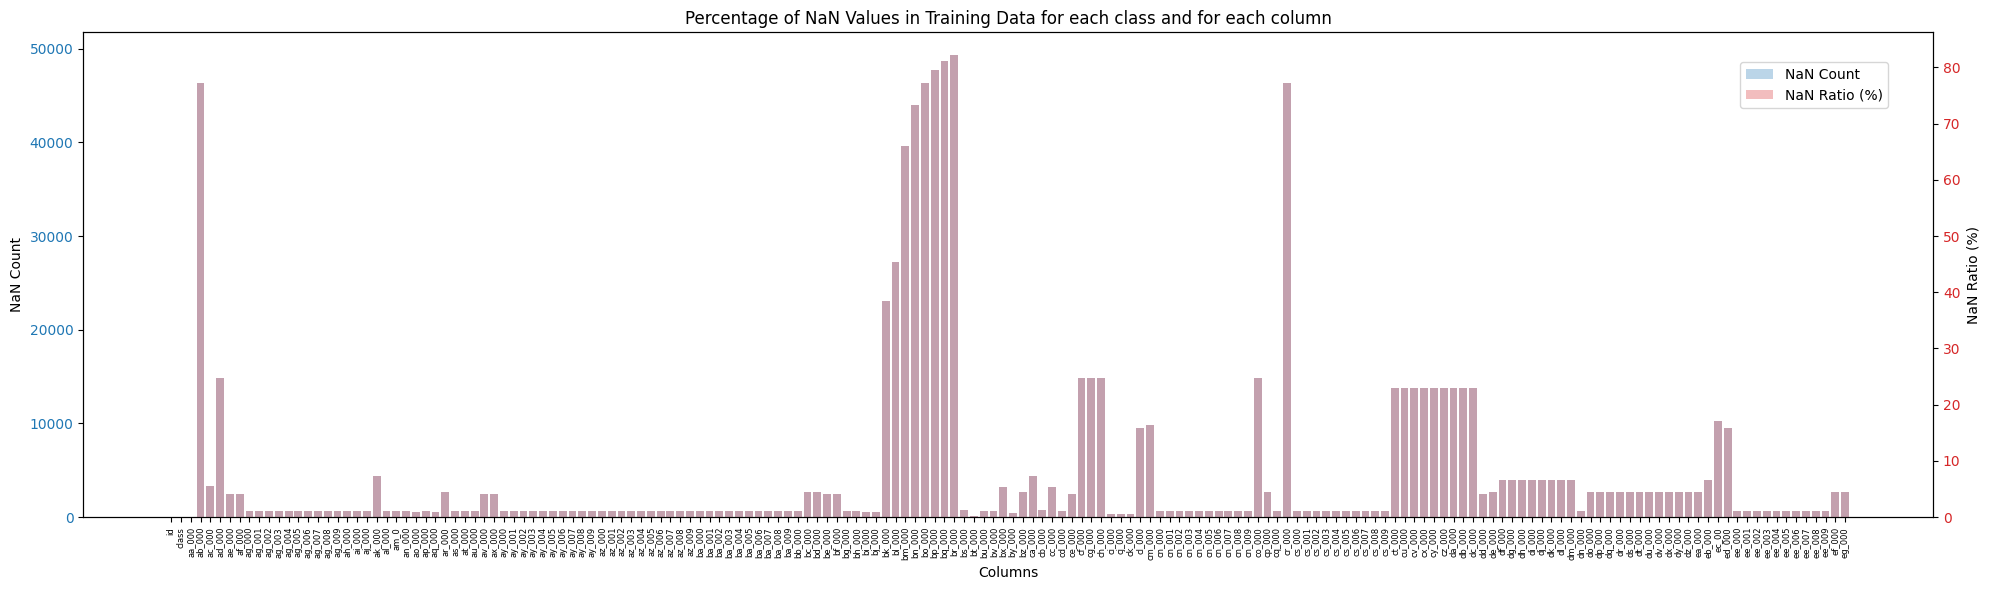

In [30]:
# plot how many na values and raito of na values in each column
na_count = data_frame.isnull().sum()
na_ratio = na_count / data_frame.shape[0] * 100
na_examination_df = pd.DataFrame(list(zip(data_frame.columns, na_count, na_ratio)), columns=['Column', 'NaN Count', 'NaN Ratio (%)'])

fig, ax1 = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90, fontsize=6)
# plot NaN count
ax1.bar(na_examination_df['Column'], na_examination_df['NaN Count'], color='tab:blue', alpha=0.3, label='NaN Count')
ax1.set_xlabel('Columns')
ax1.set_ylabel('NaN Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# plot NaN ratio
ax2 = ax1.twinx()
ax2.bar(na_examination_df['Column'], na_examination_df['NaN Ratio (%)'], color='tab:red', alpha=0.3, label='NaN Ratio (%)')
ax2.set_ylabel('NaN Ratio (%)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# set title and legend
plt.title('Percentage of NaN Values in Training Data for each class and for each column')
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.9))


plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


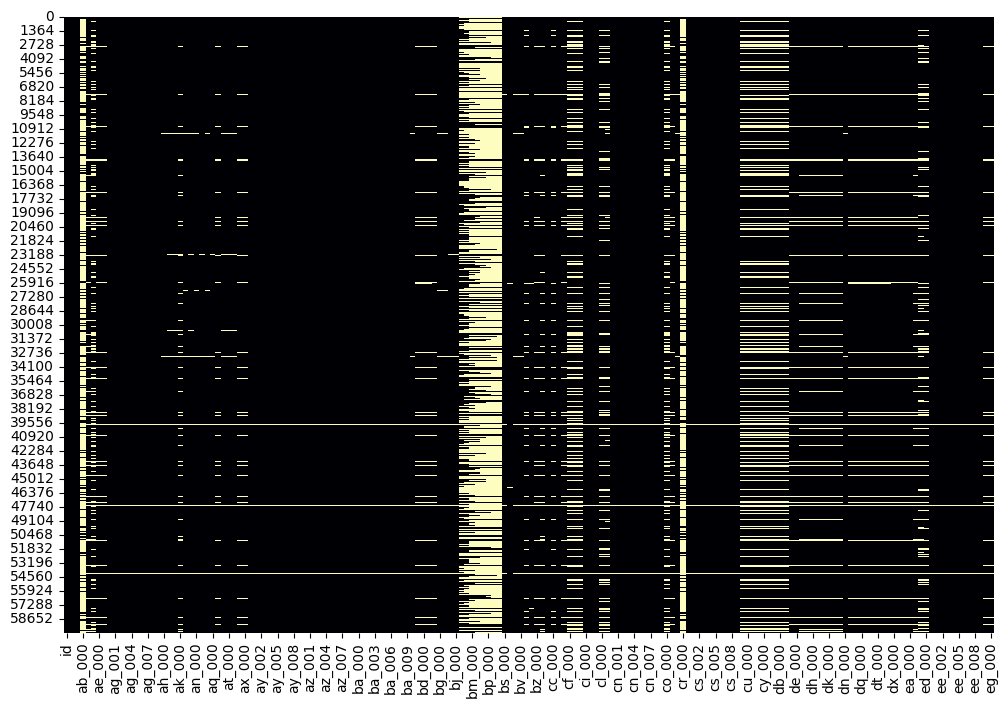

In [34]:
# heatmap of the missing values in the dataset
plt.figure(figsize=(12,8)) # You can adjust the figure size as per your requirement
sns.heatmap(data_frame.isnull(), cbar=False, cmap='magma')
plt.show()

['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']


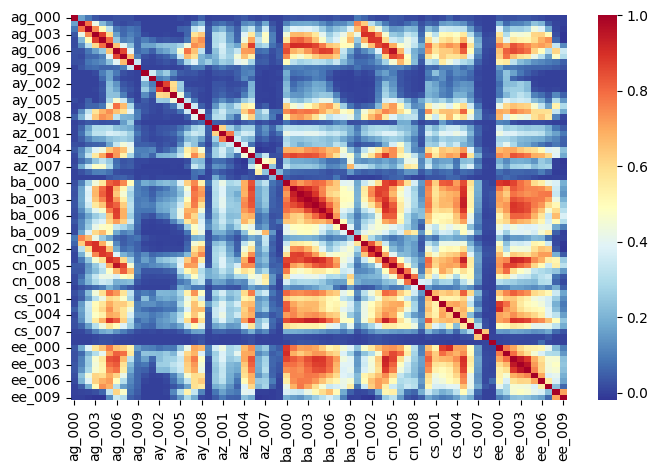

26
{'ay_003', 'cs_002', 'ba_004', 'cn_002', 'cs_000', 'az_005', 'cn_001', 'cn_003', 'cs_003', 'ag_004', 'cs_005', 'ee_001', 'ba_001', 'cn_005', 'ag_007', 'ee_000', 'ee_002', 'ba_000', 'cn_004', 'ba_005', 'ba_003', 'ba_002', 'cn_006', 'ee_004', 'ba_006', 'ee_003'}


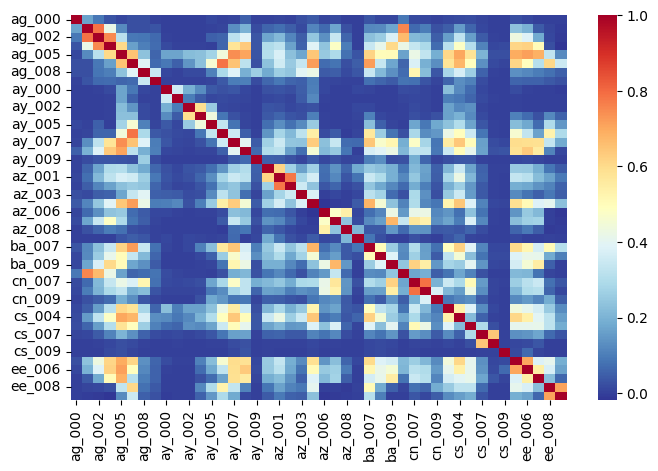

In [32]:
from collections import Counter

def get_tag(name):
    return name.split("_")[0]

all_columns_with_tags = [a for a in data_frame.columns if "_" in a] # Selecting columns having "_" in name.
all_tags = [get_tag(a) for a in all_columns_with_tags] # Selecting all Identifier name only ex:- ["aa","ab"....].
unique_col = list(set(all_tags)) # Selecting all unique Identifier. 
col_count = [v for k,v in Counter(all_tags).items()] # Calcution of Count of each unique Identifier.

# Select tags with 10 attributes each
hists = [k for k, v in Counter(all_tags).items() if v == 10]
print(hists)
hists_columns = [k for k in all_columns_with_tags if get_tag(k) in hists]

# Create a dictionary to store columns for each tag
hists_dict = {k: [col for col in hists_columns if k in col] for k in hists if get_tag(k) in hists}

# Create a new matrix for columns with 10 attributes each
new_matrix = data_frame[hists_columns].copy()
#data_frame.drop(hists_columns, axis=1, inplace=True)

train_corr = new_matrix.corr()
plt.figure(figsize=(8, 5))
trace = sns.heatmap(train_corr, cmap=plt.cm.RdYlBu_r)
plt.show()

# Find the columns with high correlation, greater than 0.8
high_corr_cols = set()
for i in range(len(train_corr.columns)):
    for j in range(i):
        if abs(train_corr.iloc[i, j]) > 0.8:
            colname = train_corr.columns[i]
            high_corr_cols.add(colname)

print(len(high_corr_cols))
print(high_corr_cols)
new_matrix = new_matrix.drop(columns=high_corr_cols)

# Plot the updated correlation matrix
plt.figure(figsize=(8, 5))
trace = sns.heatmap(new_matrix.corr(), cmap=plt.cm.RdYlBu_r)
plt.show()

#data_frame = pd.concat([data_frame, new_matrix], axis=1)
